### 例子1

In [1]:
# Scipy一般都是操控Numpy数组来进行科学计算、统计分析，所以可以说是基于Numpy之上了
# from __future__ import _，则意味着在新旧版本的兼容性方面存在差异，处理方法是按照最新的特性来处理

from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [7]:
# 数据准备
dta1=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta=np.array(dta,dtype=np.float) 
dta = pd.Series(dta)

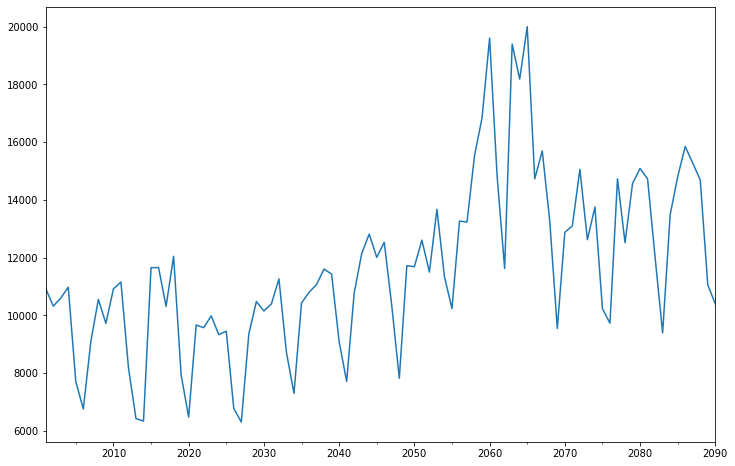

In [15]:
# 添加时间信息，展示数据
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090')) 
dta.plot(figsize=(12,8))
plt.show() 

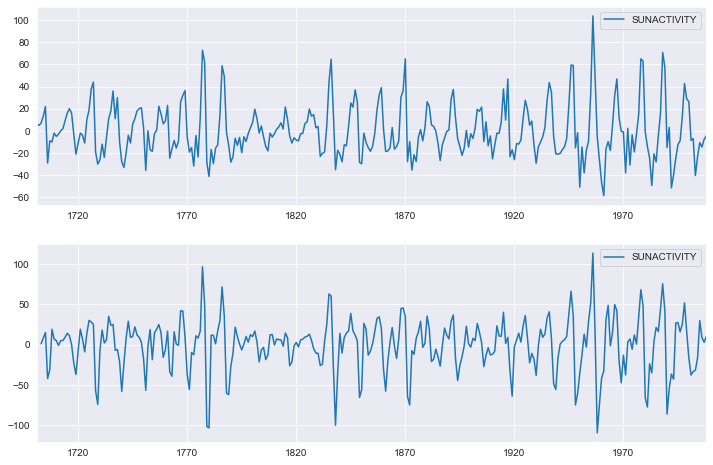

In [131]:
# 差分处理：将不平稳数据转为平稳数据
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
diff1 = dta.diff(1)
diff1.dropna(inplace=True)
diff1.plot(ax=ax1)
ax2= fig.add_subplot(212)
diff2 = diff1.diff(2)
diff2.plot(ax=ax2)
plt.show() 

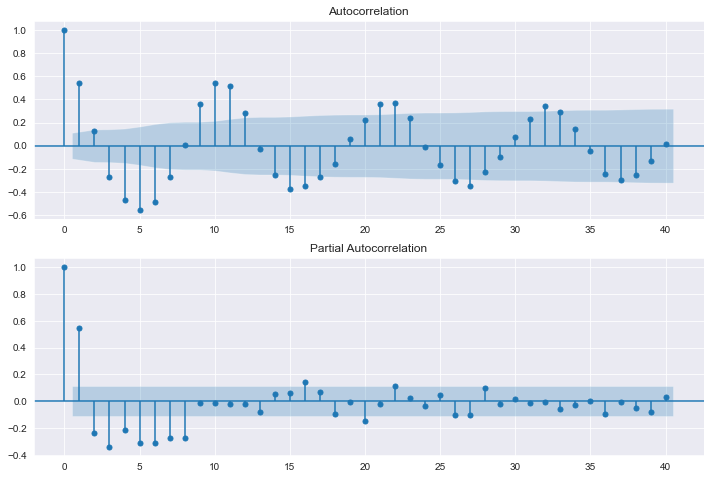

In [106]:
# 寻找合适的p q
## 检查平稳时间序列的自相关图和偏自相关图
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1[1:],lags=40,ax=ax2)

In [132]:
## 模型选择
arma_mod70 = sm.tsa.ARMA(diff1,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(diff1,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(diff1,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(diff1,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


2589.56096624393 2623.131864290692 2602.9841592486478
2743.278276627907 2754.4685759768277 2747.7526742961463


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


2572.411689884154 2609.71268771389 2587.3263487782847


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


2566.639873773564 2603.9408716033 2581.5545326676947


In [133]:
##  检验残差序列，是否为白噪音序列
resid = arma_mod80.resid

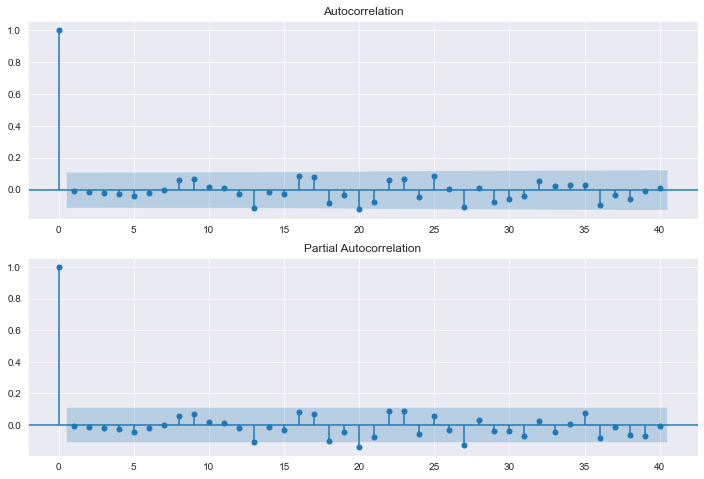

In [134]:
### 残差序列的自相关图和偏自相关图
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

In [135]:
### D-W检验，检验自相关性
"""
检验一阶自相关性。因为自相关系数ρ的值介于-1和1之间，所以0≤DW≤４。
DW＝O＝＞ρ＝１　　 即存在正自相关性 
DW＝４＜＝＞ρ＝－１　即存在负自相关性 
DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性 
当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性
"""
print(sm.stats.durbin_watson(arma_mod80.resid.values))

2.005883195774461


NormaltestResult(statistic=27.060335418122104, pvalue=1.3302180137369788e-06)


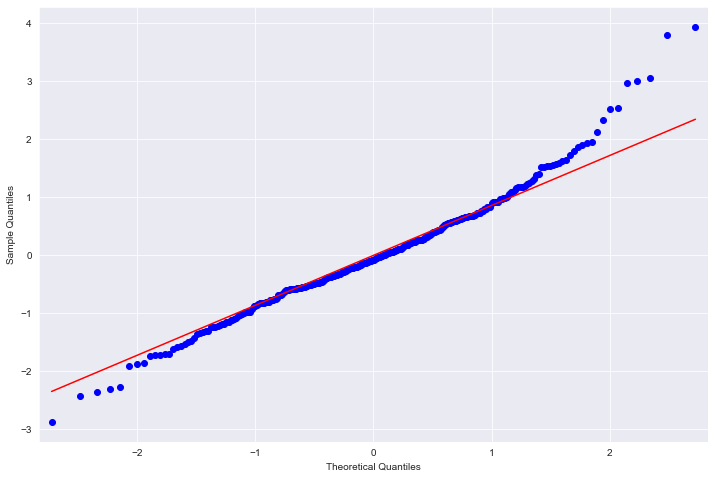

In [136]:
### 使用qq图，检测是否符合正态分布
"""
验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布
"""
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [137]:
### 残差序列Ljung-Box检验，也叫Q检验
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

"""
prob值均大于0.05，所以残差序列不存在自相关性
"""

            AC          Q  Prob(>Q)
lag                                
1.0  -0.006732   0.014096  0.905491
2.0  -0.014510   0.079794  0.960889
3.0  -0.022110   0.232826  0.972124
4.0  -0.024786   0.425779  0.980312
5.0  -0.042357   0.991140  0.963277
6.0  -0.018991   1.105171  0.981309
7.0   0.000080   1.105173  0.992949
8.0   0.057762   2.167038  0.975458
9.0   0.065353   3.530886  0.939496
10.0  0.014644   3.599599  0.963608
11.0  0.009607   3.629269  0.979536
12.0 -0.026729   3.859727  0.985837
13.0 -0.113719   8.045311  0.840636
14.0 -0.014520   8.113778  0.883315
15.0 -0.028637   8.381023  0.907600
16.0  0.083872  10.681213  0.828722
17.0  0.076371  12.594916  0.762853
18.0 -0.081891  14.802862  0.675456
19.0 -0.034660  15.199746  0.709820
20.0 -0.122185  20.149207  0.448632
21.0 -0.079784  22.266879  0.384273
22.0  0.059514  23.449339  0.376740
23.0  0.067446  24.973314  0.351663
24.0 -0.045363  25.665133  0.370372
25.0  0.083718  28.029786  0.306484
26.0  0.001150  28.030234  0

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


'\nprob值均大于0.05，所以残差序列不存在自相关性\n'

In [139]:
# 预测

predict_dta = arma_mod80.predict('2090', '2100', dynamic=True)
print(predict_dta)


fig, ax = plt.subplots(figsize=(12, 8))
ax = diff1.loc['2000':].plot(ax=ax)
fig = arma_mod80.plot_predict('2090', '2100', dynamic=True, ax=ax, plot_insample=False)
plt.show()

ValueError: could not broadcast input array from shape (0) into shape (8)

In [ ]:
"""
后续需进行模型好坏的检测 APE,MAPE
"""

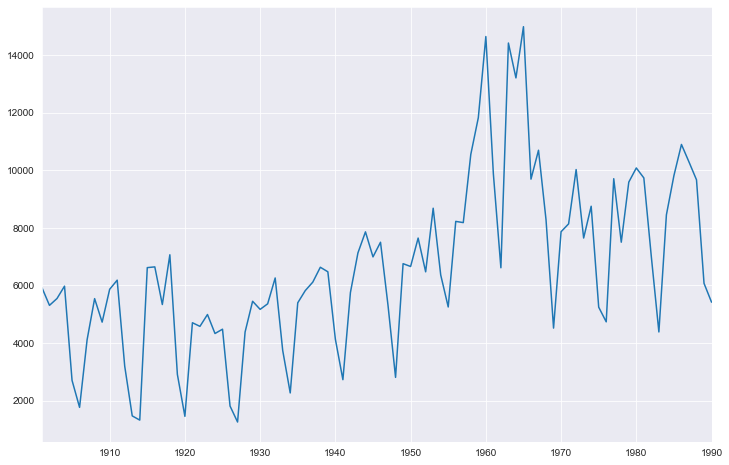

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1580.3025346294228 1602.7002619570121 1589.33041576148


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1581.7419538429795 1606.628317540301 1591.7729328785988


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1582.0274263413414 1606.913790038663 1592.0584053769608
2.0226700389315395
            AC          Q  Prob(>Q)
lag                                
1.0  -0.013626   0.017087  0.895998
2.0  -0.048114   0.232590  0.890213
3.0   0.094051   1.065614  0.785381
4.0   0.047725   1.282637  0.864314
5.0   0.157828   3.684357  0.595694
6.0  -0.015498   3.707794  0.716149
7.0  -0.241733   9.479321  0.220049
8.0   0.067336   9.932673  0.269783
9.0  -0.015056   9.955621  0.354090
10.0 -0.250210  16.373844  0.089419
11.0 -0.085552  17.133822  0.103979
12.0 -0.066881  17.604313  0.128244
13.0 -0.099119  18.651274  0.134319
14.0  0.183458  22.285780  0.072930
15.0 -0.224824  27.817815  0.022738
16.0  0.013209  27.837173  0.033065
17.0  0.172938  31.201354  0.018875
18.0 -0.054505  31.540228  0.024907
19.0 -0.059221  31.945997  0.031695
20.0  0.038316  32.118318  0.042054
21.0  0.122525  33.906328  0.037085
22.0  0.105271  35.245923  0.036512
23.0 -0.007281  35.252428  0.049089
24.0 -0.147064  37.947242

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


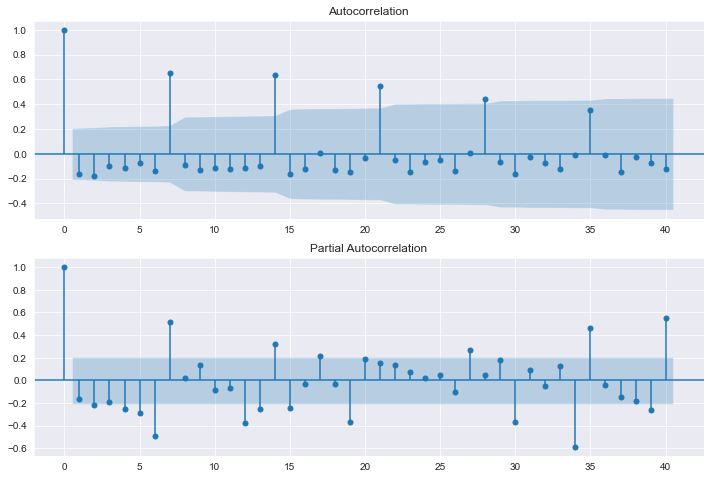

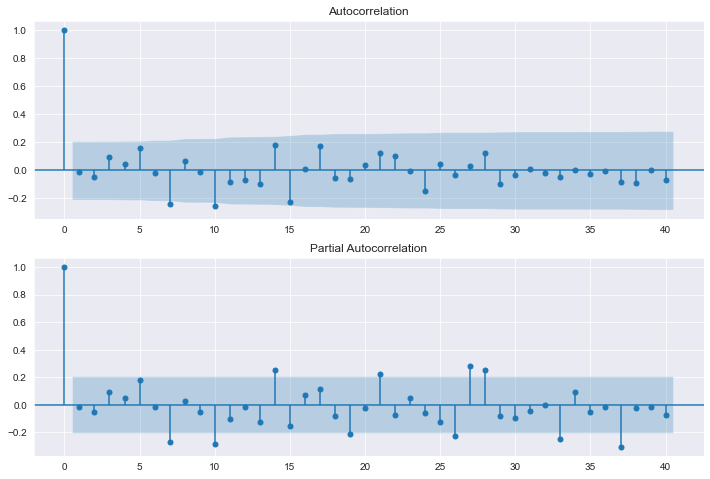

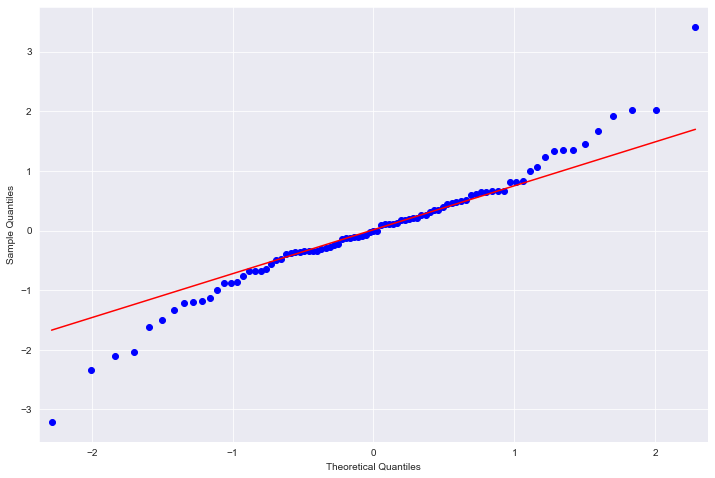

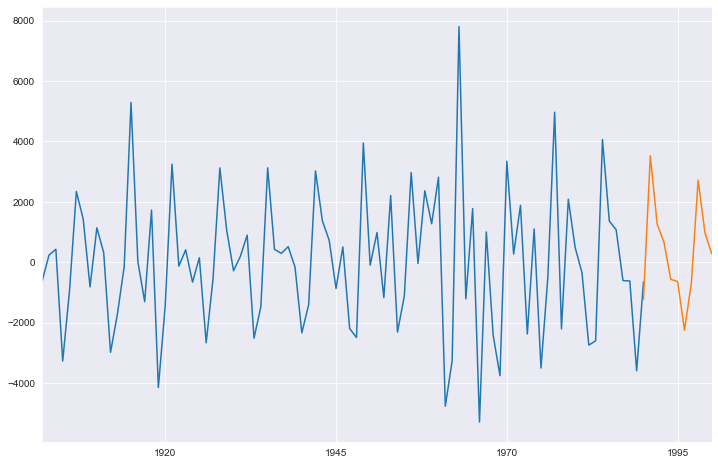

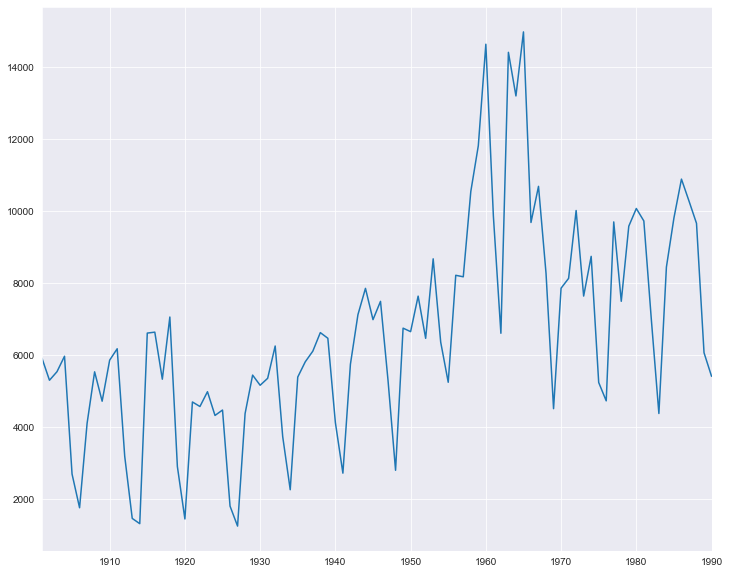

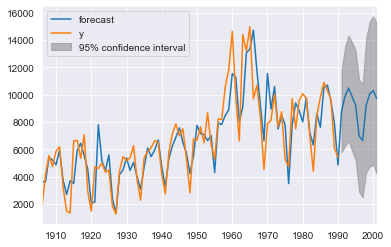

In [140]:
# -*- coding: utf-8 -*-
# 用 ARIMA 进行时间序列预测
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

# 1.创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]

data = pd.Series(data)
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1901','1990'))
data.plot(figsize=(12,8))

#绘制时序的数据图
plt.show()

#2.下面我们先对非平稳时间序列进行时间序列的差分，找出适合的差分次数d的值：
#fig = plt.figure(figsize=(12, 8))
#ax1 = fig.add_subplot(111)
#diff1 = data.diff(1)
#diff1.plot(ax=ax1)
#这里是做了1阶差分，可以看出时间序列的均值和方差基本平稳，不过还是可以比较一下二阶差分的效果：

#这里进行二阶差分
#fig = plt.figure(figsize=(12, 8))
#ax2 = fig.add_subplot(111)
#diff2 = data.diff(2)
#diff2.plot(ax=ax2)
#由下图可以看出来一阶跟二阶的差分差别不是很大，所以可以把差分次数d设置为1，上面的一阶和二阶程序我们注释掉

#这里我们使用一阶差分的时间序列
#3.接下来我们要找到ARIMA模型中合适的p和q值：
data1 = data.diff(1)
data1.dropna(inplace=True)
#加上这一步，不然后面画出的acf和pacf图会是一条直线

#第一步：先检查平稳序列的自相关图和偏自相关图
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1,lags=40,ax=ax1)
#lags 表示滞后的阶数
#第二步：下面分别得到acf 图和pacf 图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1, lags=40,ax=ax2)

#由上图可知，我们可以分别用ARMA(7,0)模型、ARMA(7,1)模型、ARMA(8,0)模型等来拟合找出最佳模型：
#第三步:找出最佳模型ARMA
arma_mod1 = sm.tsa.ARMA(data1,(7,0)).fit()
print(arma_mod1.aic, arma_mod1.bic, arma_mod1.hqic)
arma_mod2 = sm.tsa.ARMA(data1,(7,1)).fit()
print(arma_mod2.aic, arma_mod2.bic, arma_mod2.hqic)
arma_mod3 = sm.tsa.ARMA(data1,(8,0)).fit()
print(arma_mod3.aic, arma_mod3.bic, arma_mod3.hqic)

#由上面可以看出ARMA(7,0)模型最佳
#第四步：进行模型检验
#首先对ARMA(7,0)模型所产生的残差做自相关图
resid = arma_mod1.resid
#一定要加上这个变量赋值语句，不然会报错resid is not defined 
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40,ax=ax2)

#接着做德宾-沃森（D-W）检验
print(sm.stats.durbin_watson(arma_mod1.resid.values))
#得出来结果是不存在自相关性的

#再观察是否符合正态分布,这里用qq图
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q',ax=ax, fit=True)

#最后用Ljung-Box检验:检验的结果就是看最后一列前十二行的检验概率（一般观察滞后1~12阶），
#如果检验概率小于给定的显著性水平，比如0.05、0.10等就拒绝原假设，其原假设是相关系数为零。
#就结果来看，如果取显著性水平为0.05，那么相关系数与零没有显著差异，即为白噪声序列。
r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data2 = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data2, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

#第五步：平稳模型预测,对未来十年进行预测
predict_y =arma_mod1.predict('1990', '2000', dynamic=True)
#print(predict_y)
fig, ax = plt.subplots(figsize=(12,8))
ax = data1.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)

#还原到原始序列
ts_restored = pd.Series([data[0]], index=[data.index[0]]) .append(data1).cumsum()

#第六步：使用ARIMA模型进行预测
model = ARIMA(ts_restored,order=(7,1,0)) #导入ARIMA模型
result = model.fit(disp=-1)
#print(result.summary())
result.conf_int()#模型诊断，可以发现所有的系数置信区间都不为0；即在5%的置信水平下，所有的系数都是显著的，即模型通过检验。

#最后画出时序图
fig, ax = plt.subplots(figsize=(12, 10))
ax = ts_restored.loc['1901':].plot(ax=ax)   #注意起点是从1901开始
fig = result.plot_predict(5, 100)  #因为前面是90个数，所以加上预测的10个就是100
plt.show()   #数据预测并画图


In [ ]:
# 均方根误差（RMSE）来评估模型样本内拟合的好坏

ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

#### tips

In [ ]:
#用来检查时间序列稳定性的，代码中选用的临界值为5%，p-value选用的为0.1，这个可以根据实际进行修改。

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf


def testStationarity(timeSer):

    stationarity = False

    dftest = adfuller(timeSer)
    dfoutput = Series(dftest[:4], index=[
                      'Test Statistic', 'p-value', 'lags', 'nobs'])

    for key, value in dftest[4].items():
        dfoutput['Critical values (%s)' % key] = value

    if dfoutput['Test Statistic'] < dfoutput['Critical values (5%)']:
        if dfoutput['p-value'] < 0.1:
            stationarity = True

    return stationarity


# 选择p，q值
def p_q_choice(timeSer, nlags=40, alpha=.05):

    kwargs = {'nlags': nlags, 'alpha': alpha}
    acf_x, confint = acf(timeSer, **kwargs)
    acf_px, confint2 = pacf(timeSer, **kwargs)

    confint = confint - confint.mean(1)[:, None]
    confint2 = confint2 - confint2.mean(1)[:, None]

    for key1, x, y, z in zip(range(nlags), acf_x, confint[:,0], confint[:,1]):
        if x > y and x < z:
            q = key1
            break

    for key2, x, y, z in zip(range(nlags), acf_px, confint2[:,0], confint[:,1]):
        if x > y and x < z:
            p = key2
            break

    return p, q


def proper_model(data_ts, maxLag):
    init_bic = sys.maxint
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(data_ts, order=(p, q))
            try:
                results_ARMA = model.fit(disp=-1, method='css')
            except:
                continue
            bic = results_ARMA.bic
            if bic < init_bic:
                init_p = p
                init_q = q
                init_properModel = results_ARMA
                init_bic = bic
    return init_bic, init_p, init_q, init_properModel

### 例子2 AR

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [44]:
"""
设置绘图样式

"""
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

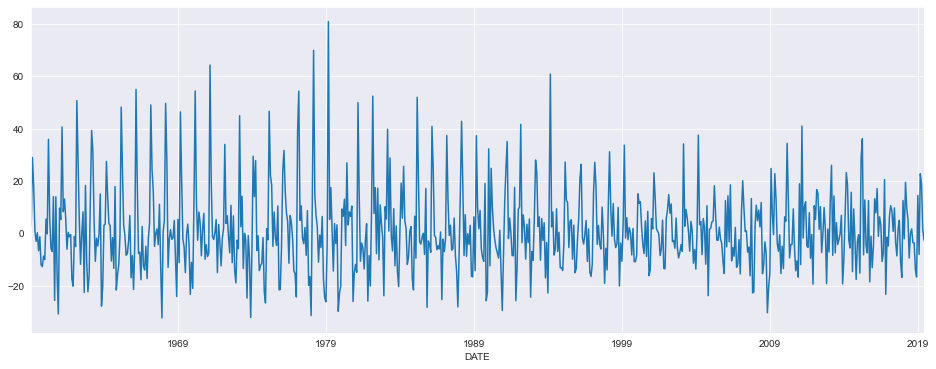

In [56]:
"""
1. DataFrame.pct_change(periods=1, fill_method=‘pad’, limit=None, freq=None, **kwargs)
表示当前元素与先前元素的相差百分比，当然指定periods=n,表示当前元素与先前n 个元素的相差百分比
2.asfreq()进行频度转换。将DatetimeIndex更改为具有不同的频率同时在当前索引处保留相同的值时,可以使用asfreq
 MS 代表月初
"""

data = pdr.get_data_fred('HOUSTNSA', '1959-01-01', '2019-06-01')
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq('MS')
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [58]:
mod = AutoReg(housing, 3)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Wed, 04 Nov 2020   AIC                              5.468
Time:                        14:51:58   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

In [59]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Wed, 04 Nov 2020   AIC                              5.468
Time:                        14:57:54   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1228      0.601      1.869      0.062      -0.055       2.300
HOUSTNSA.L1     0.1910      0.035      5.499      0.000       0.123       0.259
HOUSTNSA.L2     0.0058      0.039      0.150    

In [61]:
sel = ar_select_order(housing, 13)
sel.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [63]:
sel = ar_select_order(housing, 13)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Wed, 04 Nov 2020   AIC                              4.722
Time:                        15:07:18   BIC                              4.818
Sample:                    03-01-1960   HQIC                             4.759
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.3615      0.458      2.970      0.003       0.463       2.260
HOUSTNSA.L1     -0.2900      0.036     -8.161      0.000      -0.360      -0.220
HOUSTNSA.L2     -0.0828      0.031     -2.65

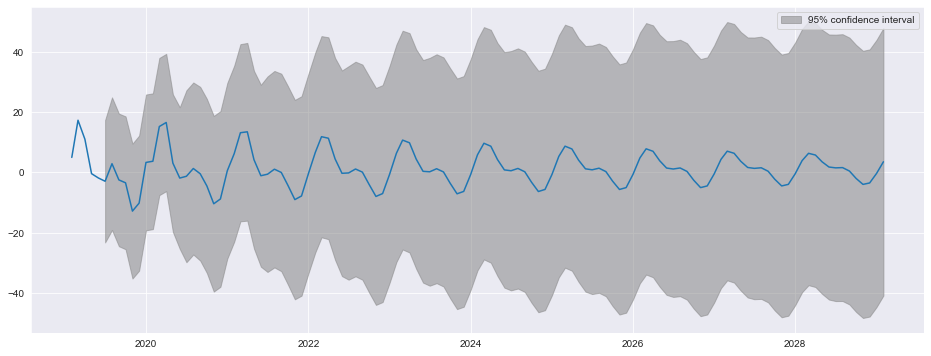

In [64]:
fig = res.plot_predict(720, 840)

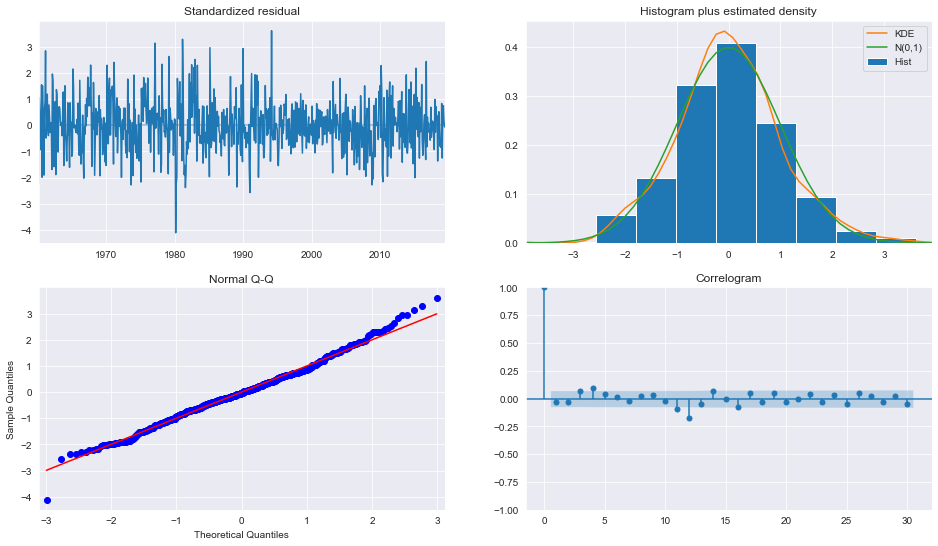

In [65]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [67]:
sel = ar_select_order(housing, 13, seasonal=True)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Wed, 04 Nov 2020   AIC                              4.541
Time:                        15:12:06   BIC                              4.636
Sample:                    04-01-1959   HQIC                             4.578
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.2726      1.373      0.927      0.354      -1.418       3.963
seasonal.1     32.6477      1.824     17.901      0.000      29.073      36.222
seasonal.2     23.0685      2.435      9.472    

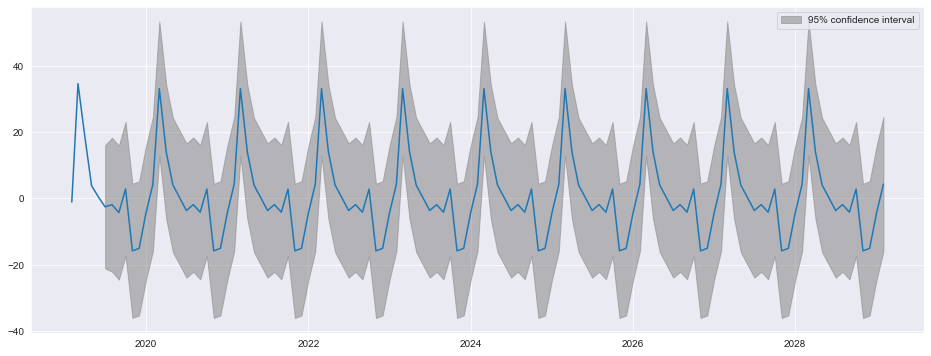

In [68]:
fig = res.plot_predict(720, 840)

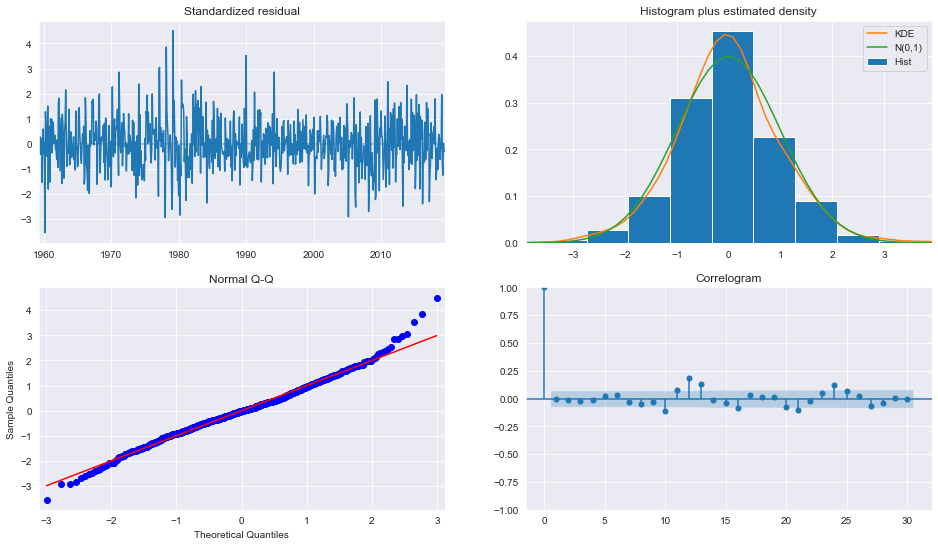

In [69]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(lags=30, fig=fig)

### 例子3 （ARMA）

In [71]:
%matplotlib inline

In [72]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [70]:
from statsmodels.graphics.api import qqplot

In [74]:
dta = sm.datasets.sunspots.load_pandas().data
dta

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [77]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

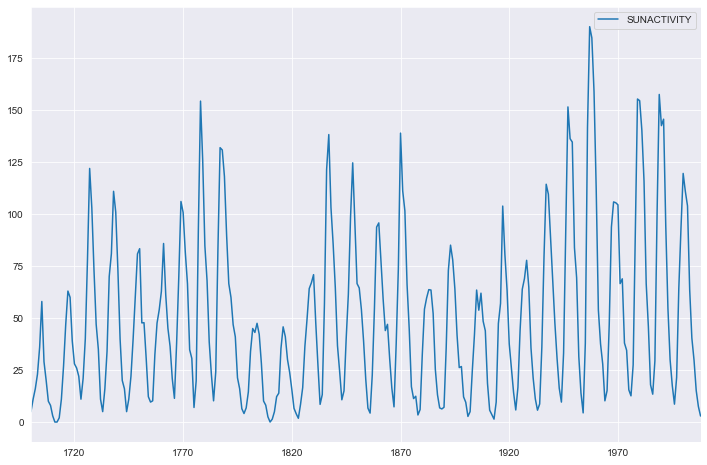

In [81]:
dta.plot(figsize=(12,8));

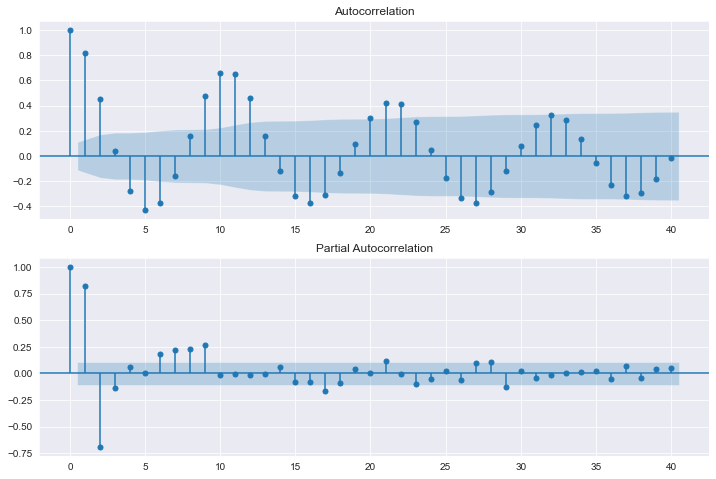

In [82]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [83]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64


In [85]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()
print(arma_mod30.params)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101139
dtype: float64


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [86]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2622.6370933011967 2637.5704584087875 2628.6074811464428
2619.4036292456653 2638.070335630154 2626.8666140522228


In [87]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564953607040854

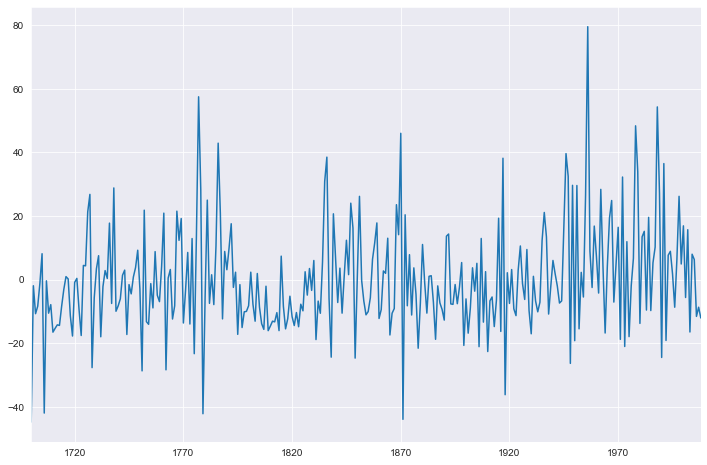

In [88]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [89]:
resid = arma_mod30.resid
stats.normaltest(resid)

NormaltestResult(statistic=49.84393226351554, pvalue=1.5015079320482824e-11)

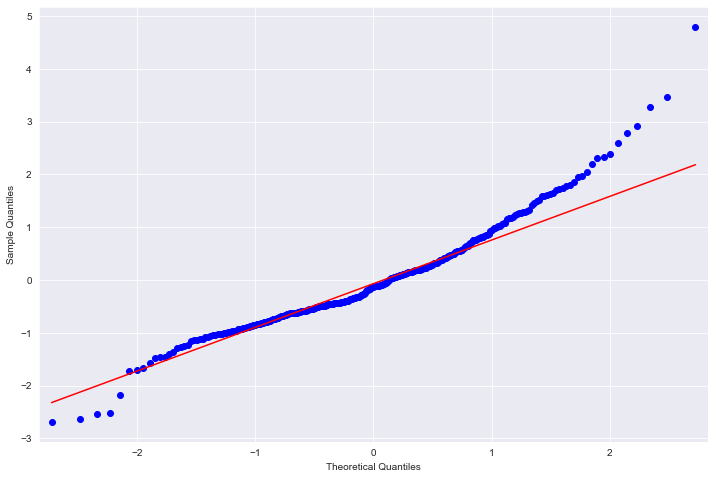

In [90]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

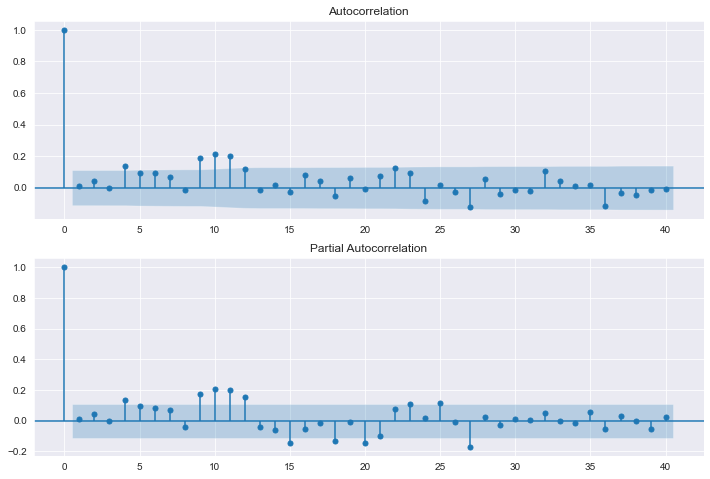

In [91]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [92]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009170   0.026239  8.713184e-01
2.0   0.041793   0.572982  7.508939e-01
3.0  -0.001338   0.573544  9.024612e-01
4.0   0.136086   6.408642  1.706385e-01
5.0   0.092465   9.111351  1.047043e-01
6.0   0.091947  11.792661  6.675737e-02
7.0   0.068747  13.296552  6.520425e-02
8.0  -0.015022  13.368601  9.978086e-02
9.0   0.187590  24.641072  3.394963e-03
10.0  0.213715  39.320758  2.230588e-05
11.0  0.201079  52.359565  2.346490e-07
12.0  0.117180  56.802479  8.580351e-08
13.0 -0.014057  56.866630  1.895209e-07
14.0  0.015398  56.943864  4.000370e-07
15.0 -0.024969  57.147642  7.746546e-07
16.0  0.080916  59.295052  6.876728e-07
17.0  0.041138  59.852008  1.111674e-06
18.0 -0.052022  60.745723  1.549418e-06
19.0  0.062496  62.040010  1.832778e-06
20.0 -0.010303  62.075305  3.383285e-06
21.0  0.074453  63.924941  3.195540e-06
22.0  0.124954  69.152954  8.984238e-07
23.0  0.093162  72.069214  5.803579e-07


In [93]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424877
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, dtype: float64


In [94]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.634832981373544

### 2020/11/6

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
tag1 = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\异常值.pkl")

In [144]:
tag2 = tag1.copy()
tag2

,ORDER_CODE,TAG_ID,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER,总胆固醇异常,甘油三酯异常,LDL异常,HDL异常
0,000012347841,OBDIM0002Tag0012,2020-01-14 00:00:00,49,M,0,0,0,0
1,000012347841,OBDIM0002EX,2020-01-14 00:00:00,49,M,0,0,0,0
2,000008161471,OBDIM0002EX,2019-09-20 00:00:00,32,M,0,0,0,0
3,000004598254,OBDIM0002EX,2019-01-06 00:00:00,22,M,0,0,0,0
4,000015553164,OBDIM0002EX,2017-01-20 09:00:00,53,MW,1,0,0,0
...,...,...,...,...,...,...,...,...,...
49995,241826419422,OBDIM0002EX,2019-11-13 00:00:00,31,M,0,0,0,0
49996,241822283992,OBDIM0002EX,2019-11-28 00:00:00,68,M,0,0,0,0
49997,241834481816,OBDIM0002EX,2019-08-16 00:00:00,56,MW,0,0,0,0
49998,241861288909,OBDIM0002EX,2019-12-13 00:00:00,56,MW,0,0,0,0


In [146]:
dict=pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\TS_脂肪肝.xls")

In [147]:
dict_abbr = dict.set_index("TagID").to_dict()["abbr1"]
tag2.replace(dict_abbr,inplace=True)
tagall_abbr = tag2.drop_duplicates().set_index('EXAM_DATE',drop=True).sort_values(by = 'EXAM_DATE')

In [151]:
tagall_abbr.head()

,ORDER_CODE,TAG_ID,EXAMINEE_AGE,EXAMINEE_GENDER,总胆固醇异常,甘油三酯异常,LDL异常,HDL异常,血脂异常项数
EXAM_DATE,,,,,,,,,
2015-08-20 09:00:00,124661727877,肝脏超声检查,64,M,0,0,0,0,0
2015-08-20 09:00:00,212315677299,肝脏超声检查,27,UW,0,1,0,0,1
2015-08-21 09:00:00,963095488334,肝脏超声检查,61,M,0,0,0,0,0
2015-08-21 09:00:00,395873622824,肝脏超声检查,29,M,1,0,1,0,2
2015-08-24 09:00:00,922585868443,肝脏超声检查,31,M,0,0,0,0,0


In [188]:
ReCount = tagall_abbr.groupby([tagall_abbr.index.year,tagall_abbr.index.month,tagall_abbr.TAG_ID])['ORDER_CODE'].count()
RC = pd.DataFrame(ReCount).unstack()
RC.columns = ['肝脏超声检查','脂肪肝']
RC["rate"] =(RC['脂肪肝'] / RC['肝脏超声检查']) *100

In [190]:
RC.columns = ['肝脏超声检查','脂肪肝']
RC["rate"] =(RC['脂肪肝'] / RC['肝脏超声检查']) *100

In [214]:
RC_ = RC.drop(['肝脏超声检查','脂肪肝'],axis = 1)

In [150]:
tagall_abbr['血脂异常项数'] = tagall_abbr.iloc[:,4:8].sum(axis = 1)

In [177]:
DateCount = pd.DataFrame(tagall_abbr.groupby([tagall_abbr.index.year,tagall_abbr.index.month])['ORDER_CODE','EXAMINEE_AGE',"血脂异常项数"].count())

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [179]:
DateCount.ORDER_CODE

EXAM_DATE  EXAM_DATE
2015       8               89
           9              144
           10             133
           11             500
           12             588
2016       1             1470
           2             6276
           3            27146
           4             8930
           5            13869
           6             8503
           7             5560
           8             4575
           9             3736
           10            4379
           11            2032
           12            2329
2017       1             2624
           2              491
           3              709
           4              536
           5             1376
           6             3317
           7             1447
           8             4755
           9             4966
           10            2788
           11            4050
           12            4227
2018       1             1474
           2              514
           3             1840
           4       

In [215]:
AgeMean = pd.DataFrame(tagall_abbr.groupby([tagall_abbr.index.year,tagall_abbr.index.month])['EXAMINEE_AGE'].mean())

In [216]:
AgeMean

EXAMINEE_AGE
EXAM_DATE EXAM_DATE              
2015      8             31.820225
          9             36.145833
          10            37.781955
          11            36.396000
          12            41.312925
2016      1             51.964626
          2             57.320905
          3             57.306307
          4             56.438298
          5             55.457495
          6             54.755263
          7             55.095324
          8             52.821639
          9             53.870717
          10            52.608358
          11            47.699311
          12            40.284672
2017      1             52.102134
          2             43.238289
          3             39.703808
          4             40.805970
          5             35.344477
          6             33.681037
          7             33.131306
          8             31.384017
          9             36.063431
          10            38.083214
          11            37.212593
          12            37.017033
2018      1             40.563094
          2             38.464981
          3             44.158152
          4             42.297159
          5             41.369574
          6             38.622601
          7             39.504013
          8             39.272503
          9             39.813593
          10            38.886586
          11            38.175523
          12            37.310856
2019      1             36.604268
          2             38.052642
          3             36.759728
          4             36.970971
          5             44.222807
          6             43.671915
          7             44.752058
          8             44.126220
          9             43.068452
          10            41.996754
          11            42.137318
          12            47.255074
2020      1             51.734251
          3             54.681443
          4             58.967269
          5             53.472280
          6             53.792627

In [167]:
BF = tagall_abbr.loc[:,["ORDER_CODE","血脂异常项数"]].drop_duplicates()
BF

,ORDER_CODE,血脂异常项数
EXAM_DATE,,
2015-08-20 09:00:00,124661727877,0
2015-08-20 09:00:00,212315677299,1
2015-08-21 09:00:00,963095488334,0
2015-08-21 09:00:00,395873622824,2
2015-08-24 09:00:00,922585868443,0
...,...,...
2020-06-03 00:00:00,403228336841,1
2020-06-03 00:00:00,931654371030,0
2020-06-03 00:00:00,867630272754,1


In [ ]:
# 一项及以上异常
BFC = BF.loc[BF.血脂异常项数 != 0,:]
BFC1 = pd.DataFrame(BFC.groupby([BFC.index.year,BFC.index.month])['血脂异常项数'].count())
BFC1['总数'] = DateCount.ORDER_CODE
BFC1['TR'] = (BFC1['血脂异常项数']/BFC1['总数'])*100

In [201]:
BFC1_ = BFC1.drop(['血脂异常项数','总数'],axis=1)
BFC1_

TR
EXAM_DATE EXAM_DATE           
2015      8          26.966292
          9          25.694444
          10         30.075188
          11         24.200000
          12         26.020408
2016      1          31.972789
          2          34.321224
          3          33.201945
          4          32.721165
          5          32.799769
          6          30.436317
          7          29.226619
          8          29.005464
          9          33.993576
          10         32.587349
          11         29.675197
          12         24.946329
2017      1          29.954268
          2          26.476578
          3          23.836389
          4          23.507463
          5          21.366279
          6          20.982816
          7          17.553559
          8          19.390116
          9          24.969795
          10         29.268293
          11         26.469136
          12         24.934942
2018      1          26.662144
          2          23.540856
          3          27.065217
          4          27.045455
          5          25.224873
          6          24.581176
          7          24.251321
          8          25.737967
          9          27.818430
          10         28.182931
          11         27.915787
          12         27.651073
2019      1          29.912335
          2          33.340056
          3          32.993873
          4          33.441812
          5          30.125329
          6          29.081124
          7          30.270851
          8          30.325026
          9          31.791998
          10         31.947757
          11         31.975560
          12         32.935403
2020      1          33.172048
          3          38.350515
          4          37.584650
          5          34.880945
          6          30.875576

In [202]:
# 两项及以上异常
BFC2 = BF.loc[BF.血脂异常项数 >= 2,:]
BFC2_ = pd.DataFrame(BFC2.groupby([BFC2.index.year,BFC2.index.month])['血脂异常项数'].count())
BFC2_['总数'] = DateCount.ORDER_CODE
BFC2_['TR'] = (BFC2_['血脂异常项数']/BFC2_['总数'])*100
BFC2_ = BFC2_.drop(['血脂异常项数','总数'],axis=1)

In [203]:
# 三项及以上异常
BFC3 = BF.loc[BF.血脂异常项数 >= 3,:]
BFC3_ = pd.DataFrame(BFC3.groupby([BFC3.index.year,BFC3.index.month])['血脂异常项数'].count())
BFC3_['总数'] = DateCount.ORDER_CODE
BFC3_['TR'] = (BFC3_['血脂异常项数']/BFC3_['总数'])*100
BFC3_ = BFC3_.drop(['血脂异常项数','总数'],axis=1)

In [204]:
#4项异常
BFC4 = BF.loc[BF.血脂异常项数 >= 4,:]
BFC4_ = pd.DataFrame(BFC4.groupby([BFC4.index.year,BFC4.index.month])['血脂异常项数'].count())
BFC4_['总数'] = DateCount.ORDER_CODE
BFC4_['TR'] = (BFC4_['血脂异常项数']/BFC4_['总数'])*100
BFC4_ = BFC4_.drop(['血脂异常项数','总数'],axis=1)

In [ ]:
# 画图

In [ ]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [209]:
data = [BFC1_,BFC2_,BFC3_,BFC4_]
data[0]

TR
EXAM_DATE EXAM_DATE           
2015      8          26.966292
          9          25.694444
          10         30.075188
          11         24.200000
          12         26.020408
2016      1          31.972789
          2          34.321224
          3          33.201945
          4          32.721165
          5          32.799769
          6          30.436317
          7          29.226619
          8          29.005464
          9          33.993576
          10         32.587349
          11         29.675197
          12         24.946329
2017      1          29.954268
          2          26.476578
          3          23.836389
          4          23.507463
          5          21.366279
          6          20.982816
          7          17.553559
          8          19.390116
          9          24.969795
          10         29.268293
          11         26.469136
          12         24.934942
2018      1          26.662144
          2          23.540856
          3          27.065217
          4          27.045455
          5          25.224873
          6          24.581176
          7          24.251321
          8          25.737967
          9          27.818430
          10         28.182931
          11         27.915787
          12         27.651073
2019      1          29.912335
          2          33.340056
          3          32.993873
          4          33.441812
          5          30.125329
          6          29.081124
          7          30.270851
          8          30.325026
          9          31.791998
          10         31.947757
          11         31.975560
          12         32.935403
2020      1          33.172048
          3          38.350515
          4          37.584650
          5          34.880945
          6          30.875576

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

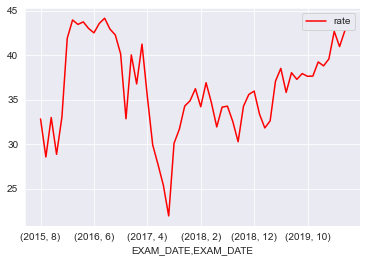

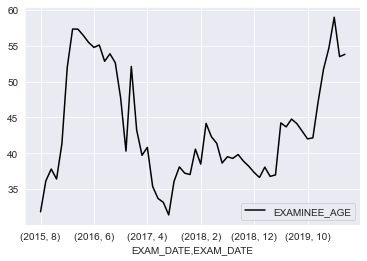

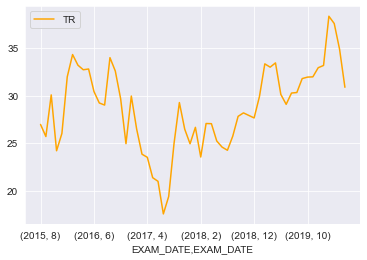

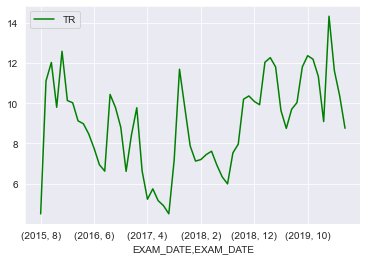

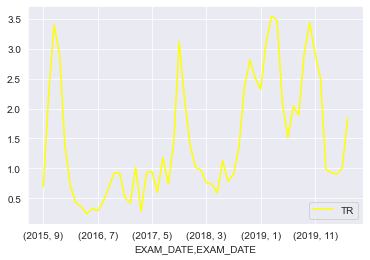

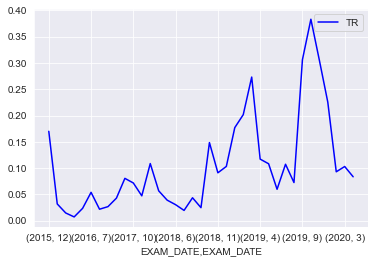

In [219]:
colors = ['red', 'black', 'orange','green','yellow','blue']
data = [RC_,AgeMean,BFC1_,BFC2_,BFC3_,BFC4_]
plt.figure()
for i in [0,1,2,3,4,5,6]:
    data[i].plot(c=colors[i]
               ,label= str(i+1)+"项以上异常"
               )
plt.legend()
plt.title('异常查看')
plt.show()

In [220]:
# 按年龄标化率
# 1) 每月检出率 RC_
# 2）每月每年龄检出率RAC
# 3）每年龄段总人数 CA
# 4）预期每年龄检出人数
# 5） 标化率

rate
EXAM_DATE EXAM_DATE           
2015      8          32.835821
          9          28.571429
          10         33.000000
          11         28.865979
          12         33.031674
2016      1          41.891892
          2          43.944954
          3          43.447474
          4          43.730887
          5          42.994123
          6          42.500419
          7          43.557965
          8          44.139887
          9          42.922724
          10         42.267706
          11         40.137931
          12         32.857958
2017      1          40.021345
          2          36.768802
          3          41.235060
          4          35.353535
          5          29.933900
          6          27.724297
          7          25.389948
          8          21.954347
          9          30.102174
          10         31.695796
          11         34.283820
          12         34.875558
2018      1          36.229205
          2          34.203655
          3          36.904762
          4          34.659526
          5          31.940144
          6          34.164283
          7          34.270696
          8          32.555898
          9          30.279528
          10         34.256868
          11         35.578674
          12         35.966304
2019      1          33.392393
          2          31.826642
          3          32.623257
          4          37.080657
          5          38.512645
          6          35.814835
          7          38.027009
          8          37.278565
          9          37.931281
          10         37.622430
          11         37.653655
          12         39.237233
2020      1          38.796332
          3          39.568345
          4          42.673108
          5          40.957268
          6          42.763158

In [248]:
tagcopy = tagall_abbr

In [512]:
T1 = tagcopy.loc[tagcopy.index.year == 2020,:] 
T1.loc[T1.index.month== 2,:]

,ORDER_CODE,TAG_ID,EXAMINEE_AGE,EXAMINEE_GENDER,总胆固醇异常,甘油三酯异常,LDL异常,HDL异常,血脂异常项数,age_split
EXAM_DATE,,,,,,,,,,


In [469]:
tagcopy1 = tagcopy.reset_index(drop = False)

In [472]:
tagcopy1["year"] =  tagcopy1.iloc[0,0].year

In [486]:
for i in range(tagcopy1.shape[0]):
    tagcopy1.iloc[i,-1]=tagcopy1.iloc[i,0].year
#     i=i.year
#     print(i)

KeyboardInterrupt: 

In [249]:
ages = tagcopy.EXAMINEE_AGE
bins = [0,20,40,60,80,100]
group_names = ["Youth","YouthAdult","MiddleAged","Senior","OldAged"]
personType=pd.cut(ages,bins,labels=group_names)

In [232]:
personType

CategoricalDtype(categories=['YouthAdult', 'MiddleAged'], ordered=True)

In [250]:
tagcopy["age_split"] = personType

In [253]:
# 7份订单的年龄为0
tagcopy.loc[tagcopy.age_split.isna() == 1,:].count()

ORDER_CODE         7
TAG_ID             7
EXAMINEE_AGE       7
EXAMINEE_GENDER    7
总胆固醇异常             7
甘油三酯异常             7
LDL异常              7
HDL异常              7
血脂异常项数             7
age_split          0
dtype: int64

In [255]:
tagcopy = tagcopy.dropna(subset = ['age_split'],axis = 0)

In [268]:
AgeTotal = pd.pivot_table(tagcopy,index = ['age_split'],values = 'ORDER_CODE',aggfunc = len )

In [348]:
AgeTotal

,ORDER_CODE
age_split,
Youth,700
YouthAdult,174059
MiddleAged,157289
Senior,58336
OldAged,493


In [345]:
RACount = tagcopy.groupby([tagcopy.age_split,tagcopy.index.year,tagcopy.index.month,tagcopy.TAG_ID])['ORDER_CODE'].count()
RAC = pd.DataFrame(RACount).unstack()

In [346]:
RAC.columns = ['肝脏超声检查','脂肪肝']
RAC["rate"] =(RAC['脂肪肝'] /RAC['肝脏超声检查']) *100

In [353]:
RAC

肝脏超声检查  脂肪肝  rate
age_split EXAM_DATE EXAM_DATE                   
Youth     2015      1               0    0   NaN
                    2               0    0   NaN
                    3               0    0   NaN
                    4               0    0   NaN
                    5               0    0   NaN
...                               ...  ...   ...
OldAged   2020      8               0    0   NaN
                    9               0    0   NaN
                    10              0    0   NaN
                    11              0    0   NaN
                    12              0    0   NaN

[360 rows x 3 columns]

In [357]:
RAC = RAC.join(AgeTotal)

In [362]:
RAC.columns

Index(['肝脏超声检查', '脂肪肝', 'rate', 'ORDER_CODE'], dtype='object')

In [364]:
RAC1 = RAC.rename(columns = {'ORDER_CODE':"标准人口数"}).drop(['肝脏超声检查','脂肪肝'],axis = 1)

In [365]:
RAC1

rate  标准人口数
age_split EXAM_DATE EXAM_DATE             
Youth     2015      1           NaN    700
                    2           NaN    700
                    3           NaN    700
                    4           NaN    700
                    5           NaN    700
...                             ...    ...
OldAged   2020      8           NaN    493
                    9           NaN    493
                    10          NaN    493
                    11          NaN    493
                    12          NaN    493

[360 rows x 2 columns]

In [366]:
RAC1["预期检出人数"] = (RAC1['标准人口数']*RAC1['rate'])/100

In [389]:
RAC1

rate  标准人口数  预期检出人数
age_split EXAM_DATE EXAM_DATE                     
Youth     2015      1           NaN    700     NaN
                    2           NaN    700     NaN
                    3           NaN    700     NaN
                    4           NaN    700     NaN
                    5           NaN    700     NaN
...                             ...    ...     ...
OldAged   2020      8           NaN    493     NaN
                    9           NaN    493     NaN
                    10          NaN    493     NaN
                    11          NaN    493     NaN
                    12          NaN    493     NaN

[360 rows x 3 columns]

In [398]:
RAC01 = RAC1.unstack().unstack()

In [412]:
RAC02 = pd.DataFrame((RAC01.预期检出人数.sum()).unstack().unstack())

In [422]:
RAC2 = RAC1.join(RAC02).rename(columns = {0:"预期检出总人数"})

In [487]:
RAC2.to_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\2020_11_6.xlsx")

In [488]:
RAC3 = pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\2020_11_6.xlsx")

In [496]:
RAC3 = RAC3.drop_duplicates(subset =['EXAM_DATE','EXAM_DATE.1','标化率'] ).loc[:,['EXAM_DATE','EXAM_DATE.1','标化率']].reset_index(drop = True)
RAC3 = RAC3.rename(columns = {"EXAM_DATE":"year","EXAM_DATE.1":"month","标化率":"Age_Adjust_Rate"})

In [499]:
RAC3 = RAC3.set_index(["year","month"])

In [513]:
RAC3.to_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\age_adjust_rate.xlsx")

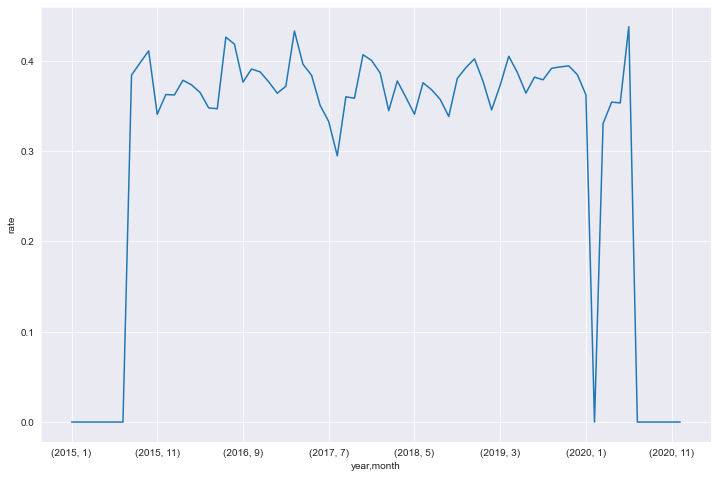

In [500]:
RAC3.Age_Adjust_Rate.plot(figsize=(12, 8))
plt.xlabel('year,month')
plt.ylabel('rate')
plt.show()

In [516]:
RAC4 = pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\age_adjust_rate.xlsx")

In [523]:
RAC4 = RAC4.set_index(["year","month"])

In [529]:
RAC4

Age_Adjust_Rate
year month                 
2015 8             0.384310
     9             0.397886
     10            0.411062
     11            0.340808
     12            0.362731
2016 1             0.362234
     2             0.378561
     3             0.373426
     4             0.364904
     5             0.347914
     6             0.346981
     7             0.426257
     8             0.418541
     9             0.376452
     10            0.391008
     11            0.387805
     12            0.376768
2017 1             0.364176
     2             0.371886
     3             0.433077
     4             0.396155
     5             0.384084
     6             0.350642
     7             0.332833
     8             0.294833
     9             0.360251
     10            0.358670
     11            0.406815
     12            0.400504
2018 1             0.386549
     2             0.344854
     3             0.377764
     4             0.359618
     5             0.340915
     6             0.375802
     7             0.368038
     8             0.357403
     9             0.338430
     10            0.380556
     11            0.392571
     12            0.402285
2019 1             0.377345
     2             0.345683
     3             0.373070
     4             0.405100
     5             0.387266
     6             0.364285
     7             0.381973
     8             0.379058
     9             0.391822
     10            0.393321
     11            0.394451
     12            0.384738
2020 1             0.362419

In [ ]:
# 做时间序列预测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

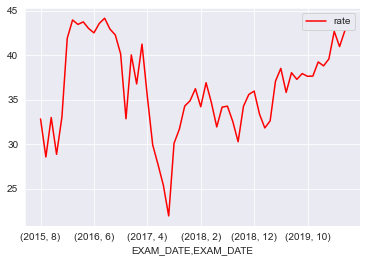

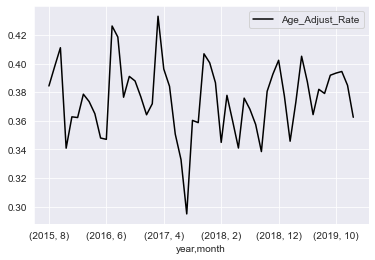

In [526]:
colors = ['red', 'black']
data = [RC_,RAC4]
plt.figure()
for i in [0,1,2]:
    data[i].plot(c=colors[i]
               ,label= str(i+1)+"项以上异常"
               )
plt.legend()
plt.title('异常查看')
plt.show()

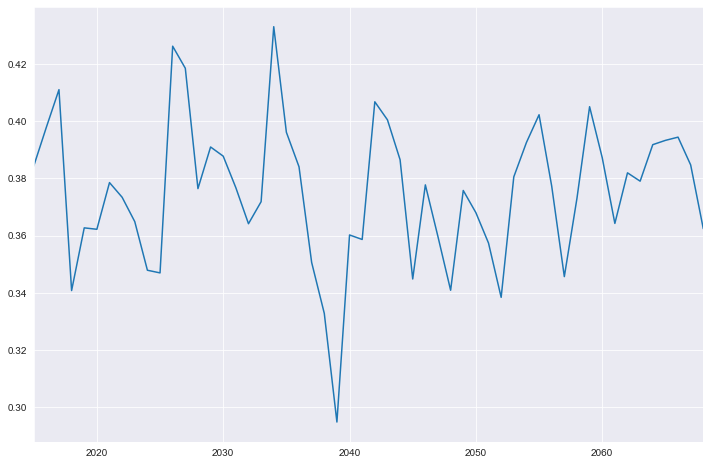

In [533]:
# 1.创建数据
data = RAC4.Age_Adjust_Rate 
data= np.array(dta,dtype=np.float) 
data = pd.Series(dta)

data.index = pd.Index(sm.tsa.datetools.dates_from_range('2015','2068')) 
data.plot(figsize=(12,8))
plt.show() 

In [ ]:
#2.下面我们先对非平稳时间序列进行时间序列的差分，找出适合的差分次数d的值：
#fig = plt.figure(figsize=(12, 8))
#ax1 = fig.add_subplot(111)
#diff1 = data.diff(1)
#diff1.plot(ax=ax1)
#这里是做了1阶差分，可以看出时间序列的均值和方差基本平稳，不过还是可以比较一下二阶差分的效果：

#这里进行二阶差分
#fig = plt.figure(figsize=(12, 8))
#ax2 = fig.add_subplot(111)
#diff2 = data.diff(2)
#diff2.plot(ax=ax2)
#由下图可以看出来一阶跟二阶的差分差别不是很大，所以可以把差分次数d设置为1，上面的一阶和二阶程序我们注释掉

#这里我们使用一阶差分的时间序列
#3.接下来我们要找到ARIMA模型中合适的p和q值：
data1 = data.diff(1)
data1.dropna(inplace=True)
#加上这一步，不然后面画出的acf和pacf图会是一条直线

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


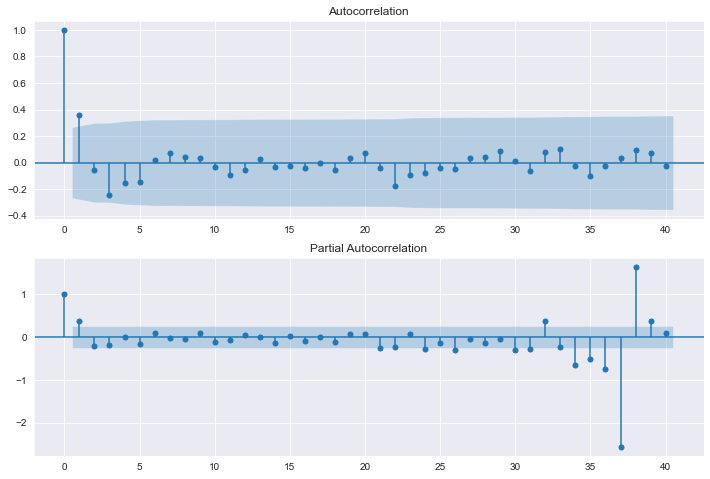

In [534]:
#第一步：先检查平稳序列的自相关图和偏自相关图
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data,lags=40,ax=ax1)
#lags 表示滞后的阶数
#第二步：下面分别得到acf 图和pacf 图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40,ax=ax2)

In [536]:
#由上图可知，我们可以分别用ARMA(7,0)模型、ARMA(7,1)模型、ARMA(8,0)模型等来拟合找出最佳模型：
#第三步:找出最佳模型ARMA
arma_mod1 = sm.tsa.ARMA(data,(0,1)).fit()
print(arma_mod1.aic, arma_mod1.bic, arma_mod1.hqic)
# arma_mod2 = sm.tsa.ARMA(data,(7,1)).fit()
# print(arma_mod2.aic, arma_mod2.bic, arma_mod2.hqic)
# arma_mod3 = sm.tsa.ARMA(data,(8,0)).fit()
# print(arma_mod3.aic, arma_mod3.bic, arma_mod3.hqic)

-247.76560228953264 -241.7986501498398 -245.464382848184


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


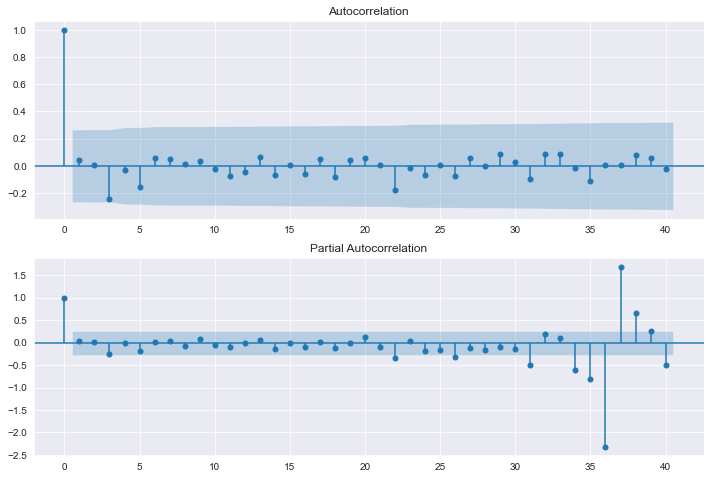

In [537]:
#由上面可以看出ARMA(7,0)模型最佳
#第四步：进行模型检验
#首先对ARMA(7,0)模型所产生的残差做自相关图
resid = arma_mod1.resid
#一定要加上这个变量赋值语句，不然会报错resid is not defined 
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40,ax=ax2)

In [539]:
#接着做德宾-沃森（D-W）检验
print(sm.stats.durbin_watson(arma_mod1.resid.values))
#得出来结果是不存在自相关性的

1.899001919414238


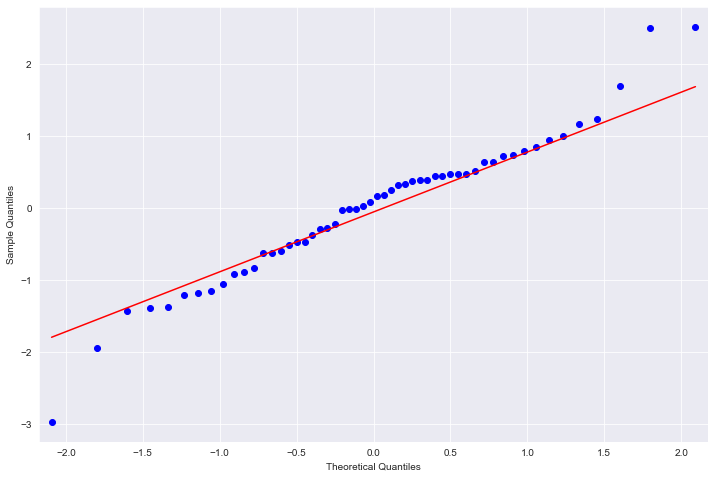

In [540]:
#再观察是否符合正态分布,这里用qq图
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q',ax=ax, fit=True)

In [541]:
#最后用Ljung-Box检验:检验的结果就是看最后一列前十二行的检验概率（一般观察滞后1~12阶），
#如果检验概率小于给定的显著性水平，比如0.05、0.10等就拒绝原假设，其原假设是相关系数为零。
#就结果来看，如果取显著性水平为0.05，那么相关系数与零没有显著差异，即为白噪声序列。
r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data2 = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data2, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.045504   0.118142  0.731059
2.0   0.008110   0.121967  0.940839
3.0  -0.247234   3.746289  0.290196
4.0  -0.031646   3.806857  0.432776
5.0  -0.158550   5.358233  0.373742
6.0   0.057481   5.566388  0.473469
7.0   0.047011   5.708584  0.574158
8.0   0.014671   5.722734  0.678258
9.0   0.038471   5.822192  0.757574
10.0 -0.024902   5.864809  0.826491
11.0 -0.074025   6.250170  0.856161
12.0 -0.048903   6.422358  0.893314
13.0  0.068076   6.764173  0.913892
14.0 -0.065198   7.085535  0.931364
15.0  0.009368   7.092339  0.955037
16.0 -0.061815   7.396421  0.964843
17.0  0.047901   7.583951  0.974653
18.0 -0.080541   8.128840  0.976656
19.0  0.043383   8.291454  0.983490
20.0  0.056177   8.572138  0.987354
21.0  0.003133   8.573037  0.992194
22.0 -0.174463  11.449354  0.967733
23.0 -0.019800  11.487596  0.977640
24.0 -0.068758  11.964139  0.980309
25.0  0.003895  11.965721  0.986842
26.0 -0.077102  12.607753  0

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


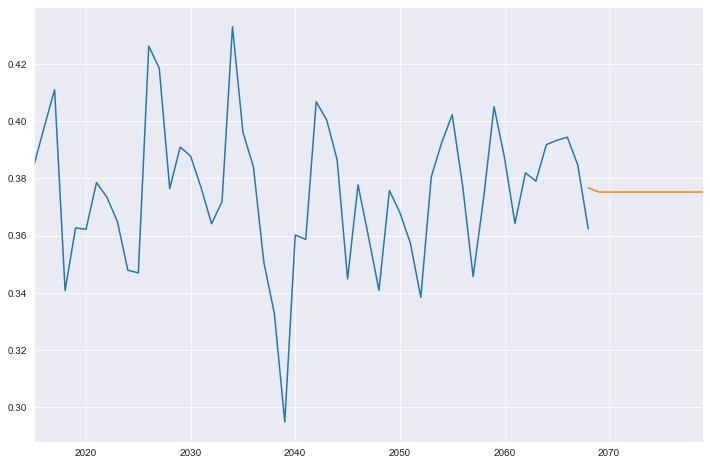

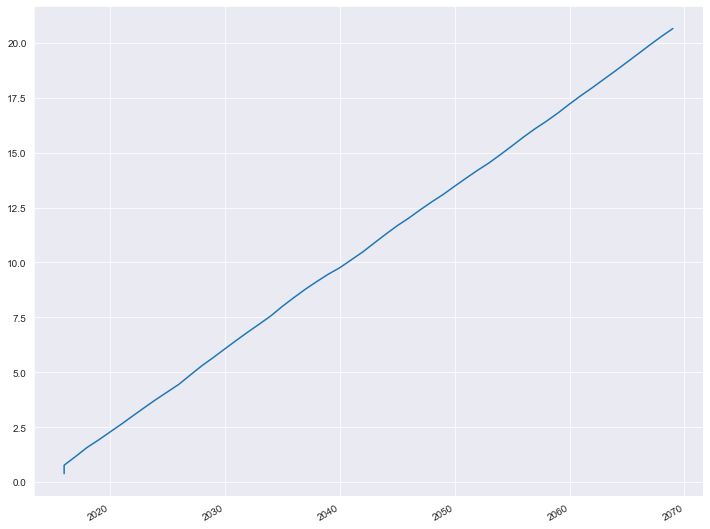

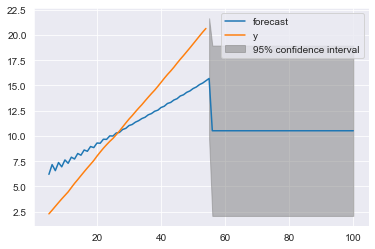

In [545]:
#第五步：平稳模型预测,对未来十年进行预测
predict_y =arma_mod1.predict('2068', '2079', dynamic=True)
#print(predict_y)
fig, ax = plt.subplots(figsize=(12,8))
ax = data.loc['2015':].plot(ax=ax)
predict_y.plot(ax=ax)

#还原到原始序列
ts_restored = pd.Series([data[0]], index=[data.index[0]]).append(data).cumsum()

#第六步：使用ARIMA模型进行预测
model = ARIMA(ts_restored,order=(0,0,1)) #导入ARIMA模型
result = model.fit(disp=-1)
#print(result.summary())
result.conf_int()#模型诊断，可以发现所有的系数置信区间都不为0；即在5%的置信水平下，所有的系数都是显著的，即模型通过检验。

#最后画出时序图
fig, ax = plt.subplots(figsize=(12, 10))
ax = ts_restored.loc['2015':].plot(ax=ax)   #注意起点是从1901开始
fig = result.plot_predict(5, 100)  #因为前面是90个数，所以加上预测的10个就是100
plt.show()   #数据预测并画图

### 20201109

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [23]:
RAC4 = pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\age_adjust_rate.xlsx")

In [41]:
RAC4.dtypes

Age_Adjust_Rate    float64
dtype: object

In [25]:
RAC4 = RAC4.astype({'year':str,'month':str})

In [28]:
RAC4["date"] = RAC4["year"].str.cat(RAC4["month"],sep = "-")

In [39]:
RAC4.index = pd.DatetimeIndex(RAC4["date"])
RAC4 = RAC4.drop(columns = ['year','month','date'])

In [40]:
RAC4

,Age_Adjust_Rate
date,
2015-08-01,0.384310
2015-09-01,0.397886
2015-10-01,0.411062
2015-11-01,0.340808
2015-12-01,0.362731
2016-01-01,0.362234
2016-02-01,0.378561
2016-03-01,0.373426
2016-04-01,0.364904


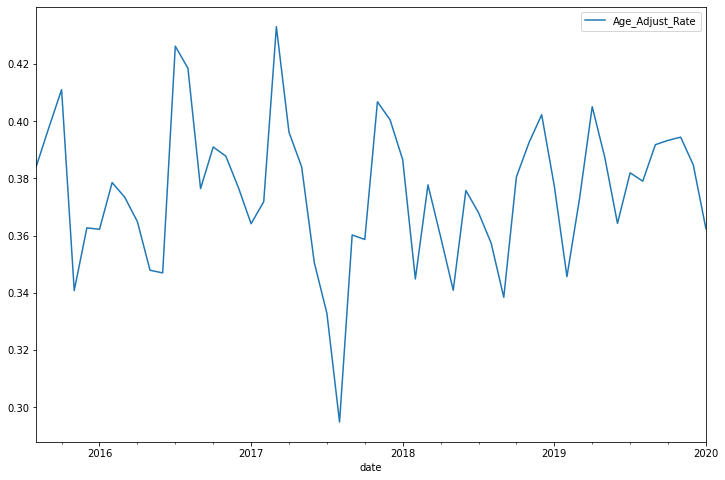

In [42]:
# 1.创建数据
data = RAC4
data.plot(figsize=(12,8))

#绘制时序的数据图
plt.show()

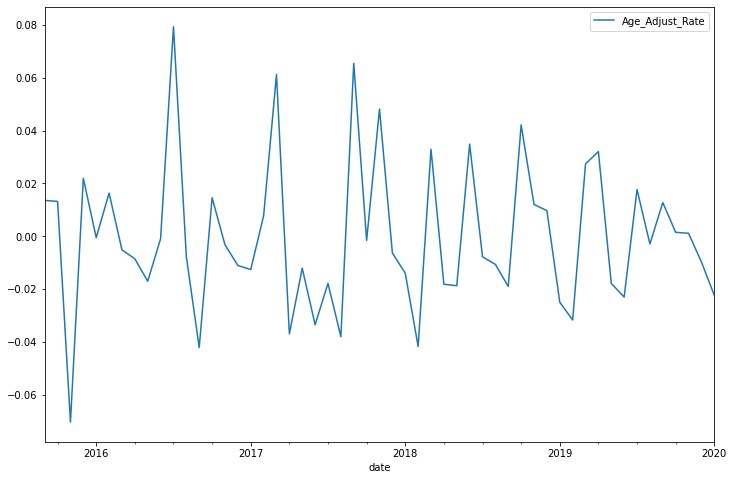

In [45]:
# 2.平稳性处理
# 1）差分
data1 = data.diff(1)
data1.dropna(inplace=True)

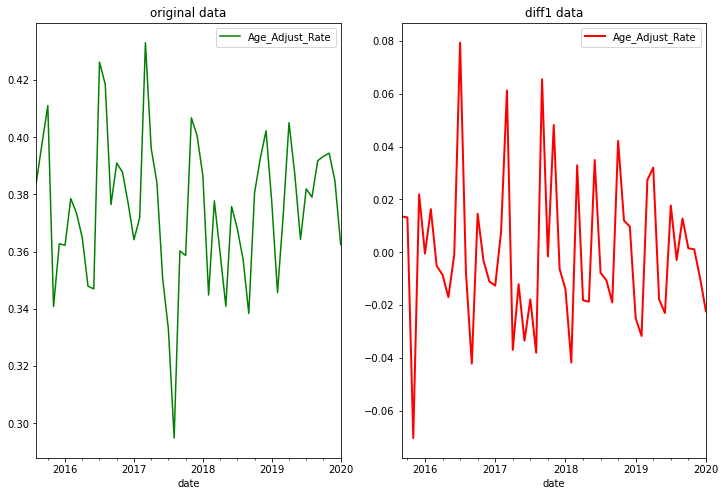

In [56]:
# 对比画图1

plt.figure(figsize = (12,8))
ax1 = plt.subplot(121)
data.plot(ax = ax1,color = "g")
plt.title("original data")

ax2 = plt.subplot(122)
data1.plot(ax = ax2,color = "r")
plt.title('diff1 data')

plt.legend()
plt.show()

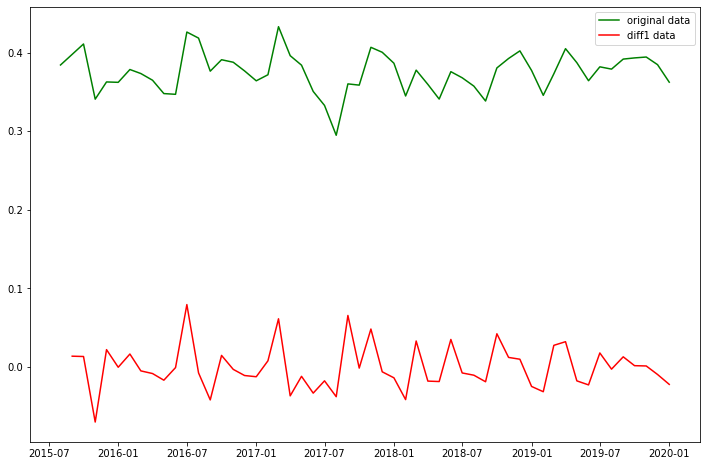

In [66]:
# 对比画图2

plt.figure(figsize = (12,8))

plt.plot(data,color = "g",label = "original data")
plt.plot(data1,color = "r",label = "diff1 data")

plt.legend()
plt.show()

Text(0.5, 1.0, 'residual')

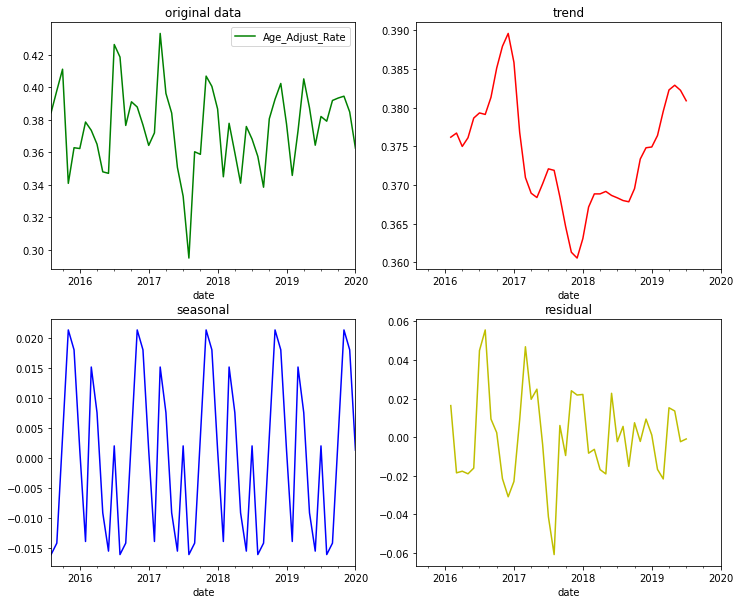

In [80]:
# 2）分解
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (12,10))

ax1 = plt.subplot(221)
data.plot(ax = ax1,color = "g")
plt.title("original data")

ax2 = plt.subplot(222)
trend.plot(ax = ax2,color = "r")
plt.title('trend')

ax3 = plt.subplot(223)
seasonal.plot(ax = ax3,color = "b")
plt.title("seasonal")

ax4 = plt.subplot(224)
residual.plot(ax = ax4,color = "y")
plt.title('residual')

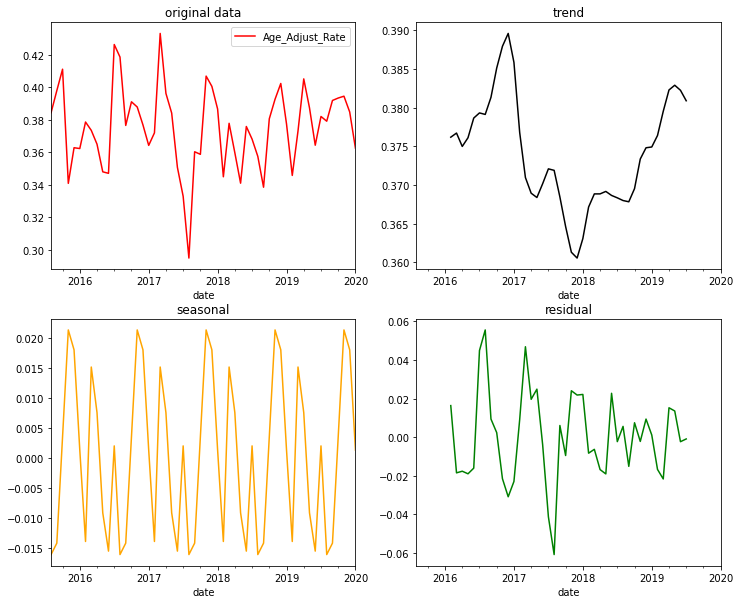

In [122]:
Data = [data,trend,seasonal,residual]
color = ['red', 'black', 'orange','green']
title = ["original data",'trend',"seasonal",'residual']

# 画子图
plt.figure(figsize = (12,10))
for i in range(0,4):
    ax = plt.subplot(2,2,i+1)
    Data[i].plot(ax = ax,color = color[i])
    plt.title(title[i])

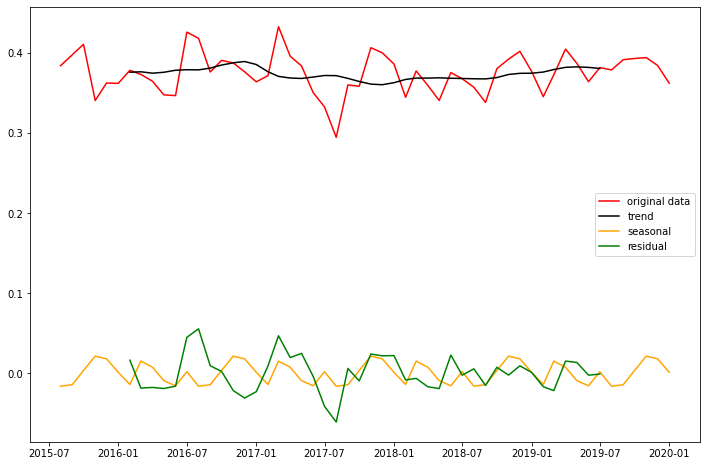

In [121]:
# 分别画图   
plt.figure(figsize = (12,8))

for i in range(0,4):
    plt.plot(Data[i],color = color[i],label = title[i])
    
plt.legend()
plt.show()  

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


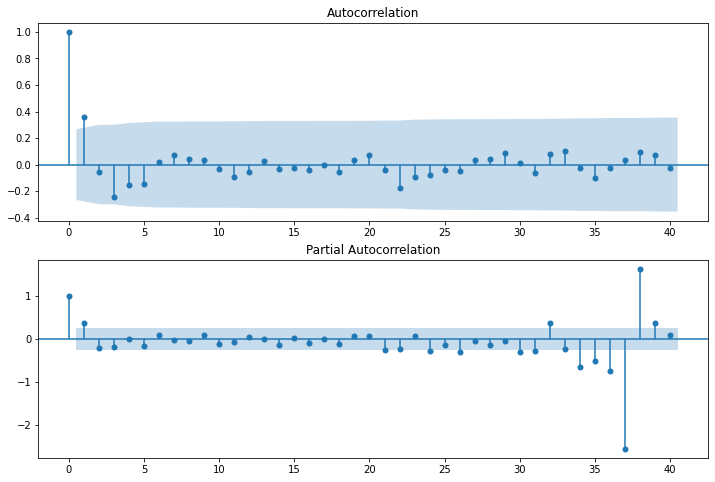

In [60]:
# 3.画自相关图和偏自相关图

plt.figure(figsize = (12,8))
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(data,lags= 40,ax = ax1)

ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data,lags = 40,ax = ax2)

plt.show()

In [67]:
# 4.找最佳模型参数

# 1）根据自相关图和偏自相关图 q = 1
arma_mod1 = sm.tsa.ARIMA(data,(0,0,1)).fit()
print(arma_mod1.aic, arma_mod1.bic, arma_mod1.hqic)

-247.76560228953264 -241.7986501498398 -245.464382848184


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# 2）调试最佳参数

from statsmodels.tsa.arima_model import ARMA

bic_value = []
p_value = []
q_value = []
for p in range(0,4):
    for q in range(0,4):
        model = ARMA(data, order=(p, q)) 
        try:
            results_ARMA = model.fit(disp=-1, method='css')
        except:
            continue
        bic = results_ARMA.bic
        p_value.append(p)
        q_value.append(q)
        bic_value.append(bic)
df = pd.DataFrame({'p':p_value,'q':q_value,'bic':bic_value})

df.loc[df.bic== df.bic.min(),:]

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


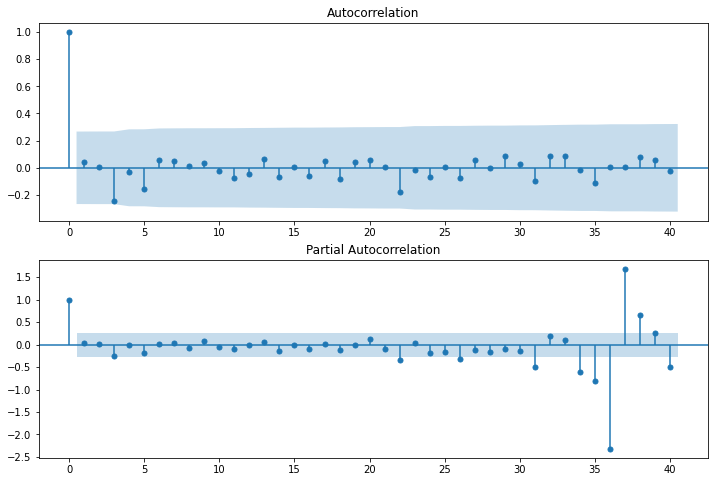

In [98]:
# 5)残差
model = ARMA(data, order=(0, 1)).fit()
resid = model.resid
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40,ax=ax2)

In [99]:
# 6) 德宾-沃森（D-W）检验
sm.stats.durbin_watson(resid.values)

1.899001919414238

<Figure size 864x576 with 0 Axes>

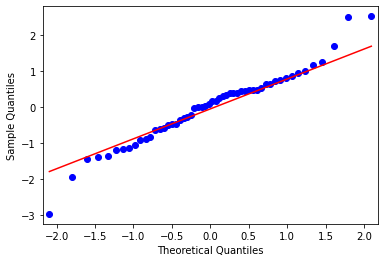

In [100]:
# 7)正态分布
fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', fit=True)

In [106]:
# 9）白噪音检测
r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data2 = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

     AC   Q  Prob(>Q)
lag                  
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN NaN       NaN
NaN NaN Na

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

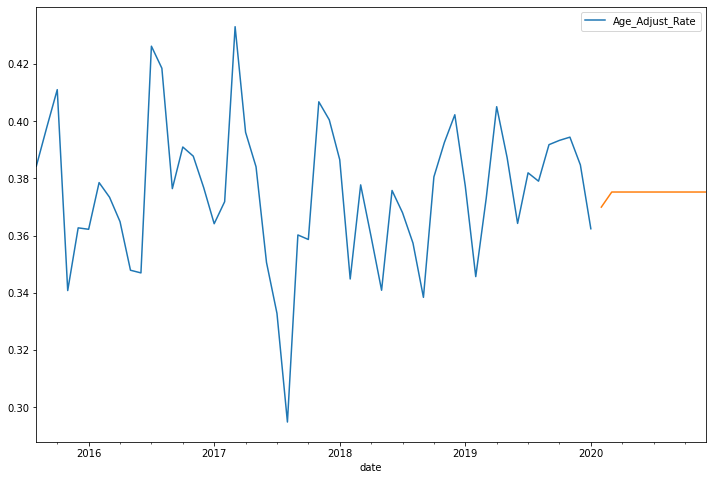

In [110]:
#第五步：平稳模型预测,对未来十年进行预测

arma_mod1 = sm.tsa.ARMA(data,(0,1)).fit()
predict_y =arma_mod1.predict('2020-02','2020-12',dynamic=True)
#print(predict_y)
fig, ax = plt.subplots(figsize=(12,8))
ax = data.loc['2015-07':].plot(ax=ax)
predict_y.plot(ax=ax)

### 20201109(2)

In [115]:
# -*-coding:utf-8-*-
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import sys
from dateutil.relativedelta import relativedelta
from copy import deepcopy
import matplotlib.pyplot as plt
 
class arima_model:
 
    def __init__(self, ts, maxLag=9):
        self.data_ts = ts
        self.resid_ts = None
        self.predict_ts = None
        self.maxLag = maxLag
        self.p = maxLag
        self.q = maxLag
        self.properModel = None
        self.bic = sys.maxint
 
    # 计算最优ARIMA模型，将相关结果赋给相应属性
    def get_proper_model(self):
        self._proper_model()
        self.predict_ts = deepcopy(self.properModel.predict())
        self.resid_ts = deepcopy(self.properModel.resid)
 
    # 对于给定范围内的p,q计算拟合得最好的arima模型，这里是对差分好的数据进行拟合，故差分恒为0
    def _proper_model(self):
        for p in np.arange(self.maxLag):
            for q in np.arange(self.maxLag):
                # print p,q,self.bic
                model = ARMA(self.data_ts, order=(p, q))
                try:
                    results_ARMA = model.fit(disp=-1, method='css')
                except:
                    continue
                bic = results_ARMA.bic
                # print 'bic:',bic,'self.bic:',self.bic
                if bic < self.bic:
                    self.p = p
                    self.q = q
                    self.properModel = results_ARMA
                    self.bic = bic
                    self.resid_ts = deepcopy(self.properModel.resid)
                    self.predict_ts = self.properModel.predict()
 
    # 参数确定模型
    def certain_model(self, p, q):
            model = ARMA(self.data_ts, order=(p, q))
            try:
                self.properModel = model.fit( disp=-1, method='css')
                self.p = p
                self.q = q
                self.bic = self.properModel.bic
                self.predict_ts = self.properModel.predict()
                self.resid_ts = deepcopy(self.properModel.resid)
            except:
                print ('You can not fit the model with this parameter p,q, ' \
                      'please use the get_proper_model method to get the best model')
 
    # 预测第二日的值
    def forecast_next_day_value(self, type='day'):
        # 我修改了statsmodels包中arima_model的源代码，添加了constant属性，需要先运行forecast方法，为constant赋值
        self.properModel.forecast()
        if self.data_ts.index[-1] != self.resid_ts.index[-1]:
            raise ValueError('''The index is different in data_ts and resid_ts, please add new data to data_ts.
            If you just want to forecast the next day data without add the real next day data to data_ts,
            please run the predict method which arima_model included itself''')
        if not self.properModel:
            raise ValueError('The arima model have not computed, please run the proper_model method before')
        para = self.properModel.params
 
        # print self.properModel.params
        if self.p == 0:   # It will get all the value series with setting self.data_ts[-self.p:] when p is zero
            ma_value = self.resid_ts[-self.q:]
            values = ma_value.reindex(index=ma_value.index[::-1])
        elif self.q == 0:
            ar_value = self.data_ts[-self.p:]
            values = ar_value.reindex(index=ar_value.index[::-1])
        else:
            ar_value = self.data_ts[-self.p:]
            ar_value = ar_value.reindex(index=ar_value.index[::-1])
            ma_value = self.resid_ts[-self.q:]
            ma_value = ma_value.reindex(index=ma_value.index[::-1])
            values = ar_value.append(ma_value)
 
        predict_value = np.dot(para[1:], values) + self.properModel.constant[0]
        self._add_new_data(self.predict_ts, predict_value, type)
        return predict_value
 
    # 动态添加数据函数，针对索引是月份和日分别进行处理
    def _add_new_data(self, ts, dat, type='day'):
        if type == 'day':
            new_index = ts.index[-1] + relativedelta(days=1)
        elif type == 'month':
            new_index = ts.index[-1] + relativedelta(months=1)
        ts[new_index] = dat
 
    def add_today_data(self, dat, type='day'):
        self._add_new_data(self.data_ts, dat, type)
        if self.data_ts.index[-1] != self.predict_ts.index[-1]:
            raise ValueError('You must use the forecast_next_day_value method forecast the value of today before')
        self._add_new_data(self.resid_ts, self.data_ts[-1] - self.predict_ts[-1], type)
 
if __name__ == '__main__':
 
    # 模型拟合
    model = arima_model(RAC4)
    #  这里使用模型参数自动识别
    model.get_proper_model()
#     print ('bic:', model.bic, 'p:', model.p, 'q:', model.q)
#     print (model.properModel.forecast()[0])
#     print model.forecast_next_day_value(type='month')
 
#     # 预测结果还原
#     predict_ts = model.properModel.predict()
#     diff_shift_ts = ts_diff_1.shift(1)
#     diff_recover_1 = predict_ts.add(diff_shift_ts)
#     rol_shift_ts = rol_mean.shift(1)
#     diff_recover = diff_recover_1.add(rol_shift_ts)
#     rol_sum = ts_log.rolling(window=11).sum()
#     rol_recover = diff_recover*12 - rol_sum.shift(1)
#     log_recover = np.exp(rol_recover)
#     log_recover.dropna(inplace=True)
 
    # 预测结果作图
#     ts = ts[log_recover.index]
#     plt.figure(facecolor='white')
#     log_recover.plot(color='blue', label='Predict')
#     ts.plot(color='red', label='Original')
#     plt.legend(loc='best')
#     plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
#     plt.show()

AttributeError: module 'sys' has no attribute 'maxint'

[-241.50483263947592,
 -247.76560228953264,
 -246.55766559993486,
 -247.7574110703079,
 -246.9260733394275,
 -246.08861796790865]

TypeError: unsupported operand type(s) for -: 'str' and 'str'